In [50]:
from random import randint
from random import random
import pandas as pd
# Part 2.a
df = pd.read_csv("../genres_v2M.csv")
fields = {"Fields":[str(x) for x in df.columns], "Types":[str(df[x].dtype) for x in df.columns], 
         "Missing Data": ["True" if df[x].isnull().any() else "False" for x in df.columns]}
display(df.sample(10))
display(df.info())
fields_DataFrame = pd.DataFrame(data=fields)
display(fields_DataFrame)

df["duration_ms"] = [-x if randint(0,10) == 3 else x for x in df["duration_ms"].values]
df["loudness"] = [randint(70, 120) if randint(0,100) == 42 else x for x in df["loudness"].values]
df["key"] = [x+random() for x in df["key"].values]
display(df.sample(5))

C:\Users\96653\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
38753,0.655,0.833,4,1.508720,0,0.1590,0.013100,0.853000,0.1050,0.426,...,3hTAU0fo9JsXtOiym4U0BQ,spotify:track:3hTAU0fo9JsXtOiym4U0BQ,https://api.spotify.com/v1/tracks/3hTAU0fo9JsX...,https://api.spotify.com/v1/audio-analysis/3hTA...,357380,4,dnb,NaN,17376.0,Drum and Bass 2020
40390,0.470,0.913,8,2.437614,0,0.0859,0.001120,0.000000,0.3430,0.316,...,5OVjz2XEjgaoaADHERO20a,spotify:track:5OVjz2XEjgaoaADHERO20a,https://api.spotify.com/v1/tracks/5OVjz2XEjgao...,https://api.spotify.com/v1/audio-analysis/5OVj...,229500,4,hardstyle,NaN,19045.0,Best of Hardstyle 2020
16385,0.800,0.496,7,0.702569,1,0.0506,0.000298,0.000000,0.0697,0.357,...,7i7UIbm5E0DD7aSOYvwp2v,spotify:track:7i7UIbm5E0DD7aSOYvwp2v,https://api.spotify.com/v1/tracks/7i7UIbm5E0DD...,https://api.spotify.com/v1/audio-analysis/7i7U...,256347,4,RnB,Oh (feat. Ludacris),NaN,NaN
39593,0.422,0.941,9,1.457885,0,0.0322,0.016000,0.021100,0.1640,0.322,...,3BIvKb3PKZXV7bg0iZOQFO,spotify:track:3BIvKb3PKZXV7bg0iZOQFO,https://api.spotify.com/v1/tracks/3BIvKb3PKZXV...,https://api.spotify.com/v1/audio-analysis/3BIv...,212800,4,hardstyle,NaN,18231.0,Euphoric Hardstyle
33442,0.546,0.764,5,1.937242,1,0.0530,0.080300,0.000009,0.0971,0.355,...,50DKBnjijGJ2d0WV5nqNTS,spotify:track:50DKBnjijGJ2d0WV5nqNTS,https://api.spotify.com/v1/tracks/50DKBnjijGJ2...,https://api.spotify.com/v1/audio-analysis/50DK...,197100,4,trap,NaN,12026.0,I'm a fucking Headbanger
35411,0.719,0.775,8,0.153324,1,0.1810,0.178000,0.002590,0.2320,0.132,...,4apBPVlMDXNKNvSGxoflrd,spotify:track:4apBPVlMDXNKNvSGxoflrd,https://api.spotify.com/v1/tracks/4apBPVlMDXNK...,https://api.spotify.com/v1/audio-analysis/4apB...,308589,4,trap,NaN,14001.0,RIDDIM
5202,0.655,0.766,5,-28.468120,0,0.0736,0.234000,0.000000,0.4250,0.622,...,0shSP8DgseLewHgAiMC4UL,spotify:track:0shSP8DgseLewHgAiMC4UL,https://api.spotify.com/v1/tracks/0shSP8DgseLe...,https://api.spotify.com/v1/audio-analysis/0shS...,192013,4,Underground Rap,WISH FEAT. KIDDO MARV,NaN,NaN
32285,0.534,0.958,2,0.176460,1,0.0423,0.000032,0.655000,0.1800,0.141,...,5nx8yFcZpvguXgE2ehy5ux,spotify:track:5nx8yFcZpvguXgE2ehy5ux,https://api.spotify.com/v1/tracks/5nx8yFcZpvgu...,https://api.spotify.com/v1/audio-analysis/5nx8...,341526,4,psytrance,NaN,10854.0,PSYTRANCE BANGERS best new 2020
20861,0.835,0.662,7,0.887510,0,0.0453,0.242000,0.000004,0.0596,0.960,...,0iEB2bVl2cGNDn923DtUPY,spotify:track:0iEB2bVl2cGNDn923DtUPY,https://api.spotify.com/v1/tracks/0iEB2bVl2cGN...,https://api.spotify.com/v1/audio-analysis/0iEB...,208160,4,Hiphop,Who Knows What U'll Find,NaN,NaN
36093,0.755,0.932,1,0.835254,1,0.2480,0.095400,0.001320,0.3470,0.215,...,4uDMthryx0elGpkFSmWuEv,spotify:track:4uDMthryx0elGpkFSmWuEv,https://api.spotify.com/v1/tracks/4uDMthryx0el...,https://api.spotify.com/v1/audio-analysis/4uDM...,279737,4,trap,NaN,14689.0,I'm a fucking Headbanger


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

None

,Fields,Types,Missing Data
0,danceability,float64,False
1,energy,float64,False
2,key,int64,False
3,loudness,float64,False
4,mode,int64,False
5,speechiness,float64,False
6,acousticness,float64,False
7,instrumentalness,float64,False
8,liveness,float64,False
9,valence,float64,False


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
30366,0.508,0.968,11.195914,4.375849,0,0.0479,0.000181,0.382000,0.375,0.0799,...,0LYwq4b4aEkBcsEzUrnkWm,spotify:track:0LYwq4b4aEkBcsEzUrnkWm,https://api.spotify.com/v1/tracks/0LYwq4b4aEkB...,https://api.spotify.com/v1/audio-analysis/0LYw...,403492,4,trance,NaN,8911.0,"Uplifting Trance, Euphoric Trance"
6227,0.781,0.492,9.689305,6.269324,1,0.0952,0.122000,0.000000,0.106,0.0398,...,4vEiz2ynGImIpNvPzUm4AC,spotify:track:4vEiz2ynGImIpNvPzUm4AC,https://api.spotify.com/v1/tracks/4vEiz2ynGImI...,https://api.spotify.com/v1/audio-analysis/4vEi...,252160,4,Underground Rap,Dead Beat,NaN,NaN
33725,0.774,0.857,11.108379,1.122000,1,0.3340,0.018700,0.000004,0.111,0.2080,...,4jxlh2mnAub6l7fTwomlfv,spotify:track:4jxlh2mnAub6l7fTwomlfv,https://api.spotify.com/v1/tracks/4jxlh2mnAub6...,https://api.spotify.com/v1/audio-analysis/4jxl...,217714,4,trap,NaN,12310.0,Headbangers:Dubstep/Riddim
39843,0.432,0.988,6.963978,2.267429,0,0.0497,0.047200,0.027500,0.356,0.0501,...,0YSdG9ausj9MYe4Fm7A659,spotify:track:0YSdG9ausj9MYe4Fm7A659,https://api.spotify.com/v1/tracks/0YSdG9ausj9M...,https://api.spotify.com/v1/audio-analysis/0YSd...,195071,4,hardstyle,NaN,18486.0,Euphoric Hardstyle
26475,0.656,0.953,8.360274,37.550653,0,0.0407,0.000667,0.830000,0.113,0.0323,...,72aKCPfElTuDJZfjT5kcea,spotify:track:72aKCPfElTuDJZfjT5kcea,https://api.spotify.com/v1/tracks/72aKCPfElTuD...,https://api.spotify.com/v1/audio-analysis/72aK...,384733,4,techno,NaN,5008.0,Dark Techno


In [51]:
# Part 2.b

null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns.tolist())
null_columns.drop("song_name")
df[["song_name"]] = df[["song_name"]].fillna("No Name")
for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        value = value[0]  
    df[c].fillna(value,inplace=True)
df.drop(columns=["uri","track_href", "title", "analysis_url", "id","Unnamed: 0"],inplace=True,axis=1)
display(df)

Columns with NaN values are: ['song_name', 'Unnamed: 0', 'title']


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2.763600,0.409704,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8.825323,5.311626,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,224427,4,Dark Trap,Pathology
2,0.850,0.893,5.066118,-17.250003,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0.110631,1.453015,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2.430622,0.173787,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4.686676,6.190635,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,269208,4,hardstyle,No Name
42301,0.517,0.768,0.335201,0.428377,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,210112,4,hardstyle,No Name
42302,0.361,0.821,8.191841,0.634543,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,234823,4,hardstyle,No Name
42303,0.477,0.921,6.368910,0.615231,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,323200,4,hardstyle,No Name


(42305, 13)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'danceability'),
  Text(1, 0, 'energy'),
  Text(2, 0, 'key'),
  Text(3, 0, 'loudness'),
  Text(4, 0, 'mode'),
  Text(5, 0, 'speechiness'),
  Text(6, 0, 'acousticness'),
  Text(7, 0, 'instrumentalness'),
  Text(8, 0, 'liveness'),
  Text(9, 0, 'valence'),
  Text(10, 0, 'tempo'),
  Text(11, 0, 'duration_ms'),
  Text(12, 0, 'time_signature')])

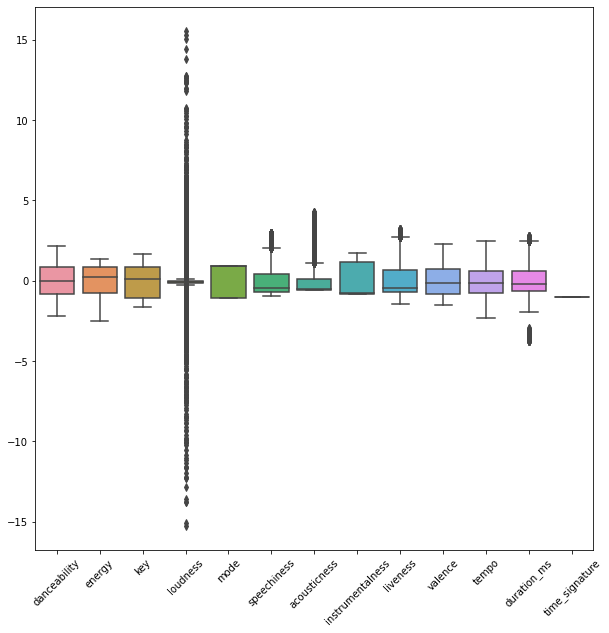

In [52]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

scaled_values = StandardScaler().fit_transform(df.select_dtypes(exclude="object"))

df2=pd.DataFrame(scaled_values,columns=df.select_dtypes(exclude="object").columns)
print(df2.shape)

threshold = 2

selected_rows= (df2<threshold).all(axis=1)  & (df2>-threshold).all(axis=1)
selected_index=df[~selected_rows].index
df2.drop(index=selected_index,inplace=True) # for analysis
ndf=df.drop(index=selected_index)  #     for interpretation
ndf.reset_index(inplace = True, drop = True) # to reset the index 
# Create the Scaler object
scaler = StandardScaler()

# Fit data on the scaler object
scaled_values=scaler.fit_transform(df2)
df2 = pd.DataFrame(scaled_values, columns=df.select_dtypes(exclude="object").columns)


import seaborn as sns 
plt.figure(figsize=(10,10))
sns.boxplot(data=df2)
plt.xticks(rotation=45)

In [53]:
display(df.corr())
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.323248,-0.012040,0.001526,0.084413,0.182177,0.069910,-0.067114,-0.196702,0.369845,-0.165929,-0.020685,0.057711
energy,-0.323248,1.000000,0.045080,0.000012,-0.032203,-0.148363,-0.497334,0.303875,0.231754,-0.013520,-0.024504,0.141751,0.039781
key,-0.012040,0.045080,1.000000,0.004515,-0.247706,-0.030559,-0.005066,0.068232,0.003216,0.029091,-0.009132,0.035792,0.008517
loudness,0.001526,0.000012,0.004515,1.000000,0.001736,-0.002638,-0.008199,-0.001622,-0.002778,-0.003312,-0.003301,0.000581,-0.000078
mode,0.084413,-0.032203,-0.247706,0.001736,1.000000,0.050260,-0.014514,-0.016402,0.007280,0.022208,-0.012191,-0.012981,-0.009317
speechiness,0.182177,-0.148363,-0.030559,-0.002638,0.050260,1.000000,0.160184,-0.386571,0.057432,0.218829,0.164674,-0.147316,0.021637
acousticness,0.069910,-0.497334,-0.005066,-0.008199,-0.014514,0.160184,1.000000,-0.261896,-0.107229,0.099328,0.055643,-0.118762,-0.049791
instrumentalness,-0.067114,0.303875,0.068232,-0.001622,-0.016402,-0.386571,-0.261896,1.000000,-0.015990,-0.257068,-0.207667,0.288499,-0.010164
liveness,-0.196702,0.231754,0.003216,-0.002778,0.007280,0.057432,-0.107229,-0.015990,1.000000,-0.025156,0.028327,0.011062,0.003077
valence,0.369845,-0.013520,0.029091,-0.003312,0.022208,0.218829,0.099328,-0.257068,-0.025156,1.000000,0.058374,-0.090505,0.040308
